In [110]:
import os

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [111]:
script_path = os.getcwd()
# print(script_path)
data_path= os.path.join(script_path, r"..\data\raw\time_series_covid19_confirmed_global.csv")
# print(os.listdir(data_path))
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179321,179328,179477,179597,179624,179674,179716,179716,179771,179835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275621,275688,275732,275732,275732,275838,275864,275881,275939,275985
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265823,265828,265834,265841,265847,265851,265854,265855,265860,265862
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42156,42572,42572,42572,42572,42572,42572,42572,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99433,99527


In [112]:
time_idx = pd_raw.columns[4:]

In [113]:
df_plot = pd.DataFrame({ 'date': time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [114]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [115]:
pd_raw[pd_raw["Country/Region"] == 'Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

,date,India,US,Germany
0,1/22/20,0,1,0
1,1/23/20,0,1,0
2,1/24/20,0,2,0
3,1/25/20,0,2,0
4,1/26/20,0,5,0
...,...,...,...,...
850,5/21/22,43136371,83263921,26044283
851,5/22/22,43138393,83282408,26045528
852,5/23/22,43140068,83390587,26109965
853,5/24/22,43142192,83501457,26159106


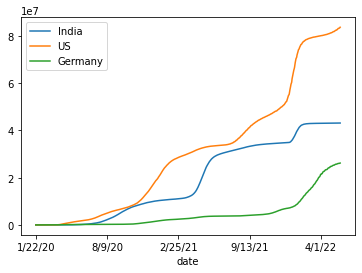

In [116]:
Country_list = ["India", "US", "Germany"]

for each in Country_list:
    df_plot[each]=np.array(pd_raw[pd_raw["Country/Region"] == each].iloc[:,4::].sum(axis=0))
%matplotlib inline
df_plot.set_index('date').plot()
df_plot

In [48]:
df_plot.date[0]

'1/22/20'

In [49]:
time_idx= [datetime.strptime(df_plot.date[0], "%m/%d/%y") for each in df_plot.date]
time_str = [each.strftime("%y-%m-%d") for each in time_idx]

In [50]:
df_plot["date"] = time_idx
type(df_plot["date"][0])
df_plot.head()

,date,India,US,Germany,China,France
0,2020-01-22,0,1,0,548,0
1,2020-01-22,0,1,0,643,0
2,2020-01-22,0,2,0,920,2
3,2020-01-22,0,2,0,1406,3
4,2020-01-22,0,5,0,2075,3


In [52]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';')

In [53]:
script_path = os.getcwd()
# print(script_path)
data_path= os.path.join(script_path, r"..\data\raw\time_series_covid19_confirmed_global.csv")
# print(os.listdir(data_path))
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179321,179328,179477,179597,179624,179674,179716,179716,179771,179835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275621,275688,275732,275732,275732,275838,275864,275881,275939,275985
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265823,265828,265834,265841,265847,265851,265854,265855,265860,265862
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42156,42572,42572,42572,42572,42572,42572,42572,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99433,99527


In [55]:
pd_data_base= pd_raw.rename(columns={"Country/Region": "country", "Province/State":"state"})
pd_data_base = pd_data_base.drop(["Lat", "Long"],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,179321,179328,179477,179597,179624,179674,179716,179716,179771,179835
1,NaN,Albania,0,0,0,0,0,0,0,0,...,275621,275688,275732,275732,275732,275838,275864,275881,275939,275985
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265823,265828,265834,265841,265847,265851,265854,265855,265860,265862
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42156,42156,42572,42572,42572,42572,42572,42572,42572,42894
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99433,99527


In [72]:
pd_relational_data = pd_data_base.set_index(["state","country"]).T.stack(level = [0,1]).reset_index().rename(columns = { 'level_0': 'date',0:'confirmed'})
pd_relational_data.dtypes
pd_relational_data['date']= pd_relational_data.date.astype('datetime64[ns]')
pd_relational_data.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [73]:
pd_relational_data.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')


In [86]:
script_path = os.getcwd()
# print(script_path)
data_path= os.path.join(script_path, r"..\data\raw\time_series_covid19_vaccine_global.csv")
# print(os.listdir(data_path))
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


In [82]:
time_idx = pd_raw.columns[12:]
df_plot = pd.DataFrame({ 'date': time_idx})
df_plot.head()




,date
0,2020-12-12
1,2020-12-13
2,2020-12-14
3,2020-12-15
4,2020-12-16


KeyError: 'Country_Region'